### David Song
### Professor Ishigaki
### CS 131, Processing Big Data
### 5 August 2024

##Objective


Learn how to train a linear regression model and show statistical measures using proper visualization with Python.

###Tasks
In this assignment, you will analyze the Wine Quality dataset (https://archive.ics.uci.edu/dataset/186/wine+qualityLinks to an external site.). Complete the following tasks ONLY FOR "WHITE" WINE data points.

1. For each feature and the target variables, obtain the mean, standard deviation, min, max, and 25/50/75% percentiles. (Show a table.)

2. Illustrate the correlation matrix of all features and the target.

3. Plot a histogram of the target value (quality).

4. Illustrate the violin plots of all features. Make sure that each plot is visible.

5. Train a linear regression model with a single input variable (alcohol). Plot all data points (x=alcohol; y=quality) and the obtained regression model. Show the intercept, coefficient, RMSE, and R^2.

6. Train a linear regression model with input variables (volatile_acidity, alcohol, and density). Show the intercept, coefficient, RMSE, and R^2.

In [2]:
pip install ucimlrepo

In [11]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [4]:
import csv

with open('/content/drive/MyDrive/3. Junior Year/3. Summer 2024/CS131/winequality-white.csv', 'r') as input_file:
    reader = csv.reader(input_file, delimiter=';')
    with open('new_file.csv', 'w', newline='') as output_file:
        writer = csv.writer(output_file, delimiter=',')
        writer.writerows(reader)

In [5]:
# Set the file path
df = pd.read_csv("new_file.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


## Question 1:

For each feature and the target variables, obtain the *mean, standard deviation, min, max, and 25/50/75% percentiles*. (Show a table.)



In [6]:
statsdf = pd.DataFrame([df.mean(), df.std(), df.min(), df.max(), df.quantile(0.25), df.quantile(0.5), df.quantile(0.75)], columns=df.columns, index=['mean', 'sd', 'min', 'max', '25%', '50%', '75%'])
statsdf

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
sd,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000


## Question 2:

Illustrate the correlation matrix of all features and the target.

In [7]:
corr_matrix = df.corr()
corr_matrix

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


## Question 3:

Plot a histogram of the target value (quality).

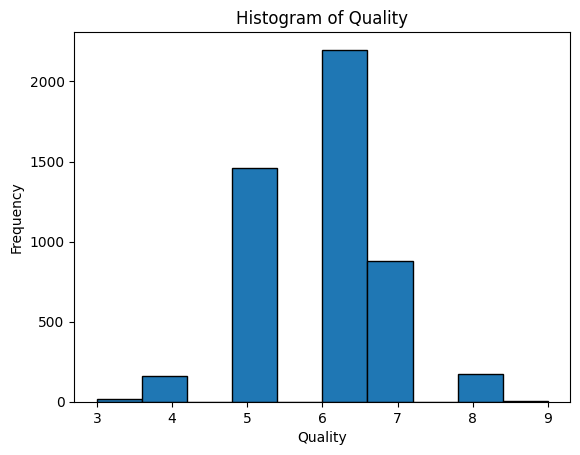

In [8]:
plt.hist(df['quality'], bins=10, edgecolor='black')
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.title('Histogram of Quality')
plt.show()

## Question 4:

Illustrate the violin plots of all features. Make sure that each plot is visible.

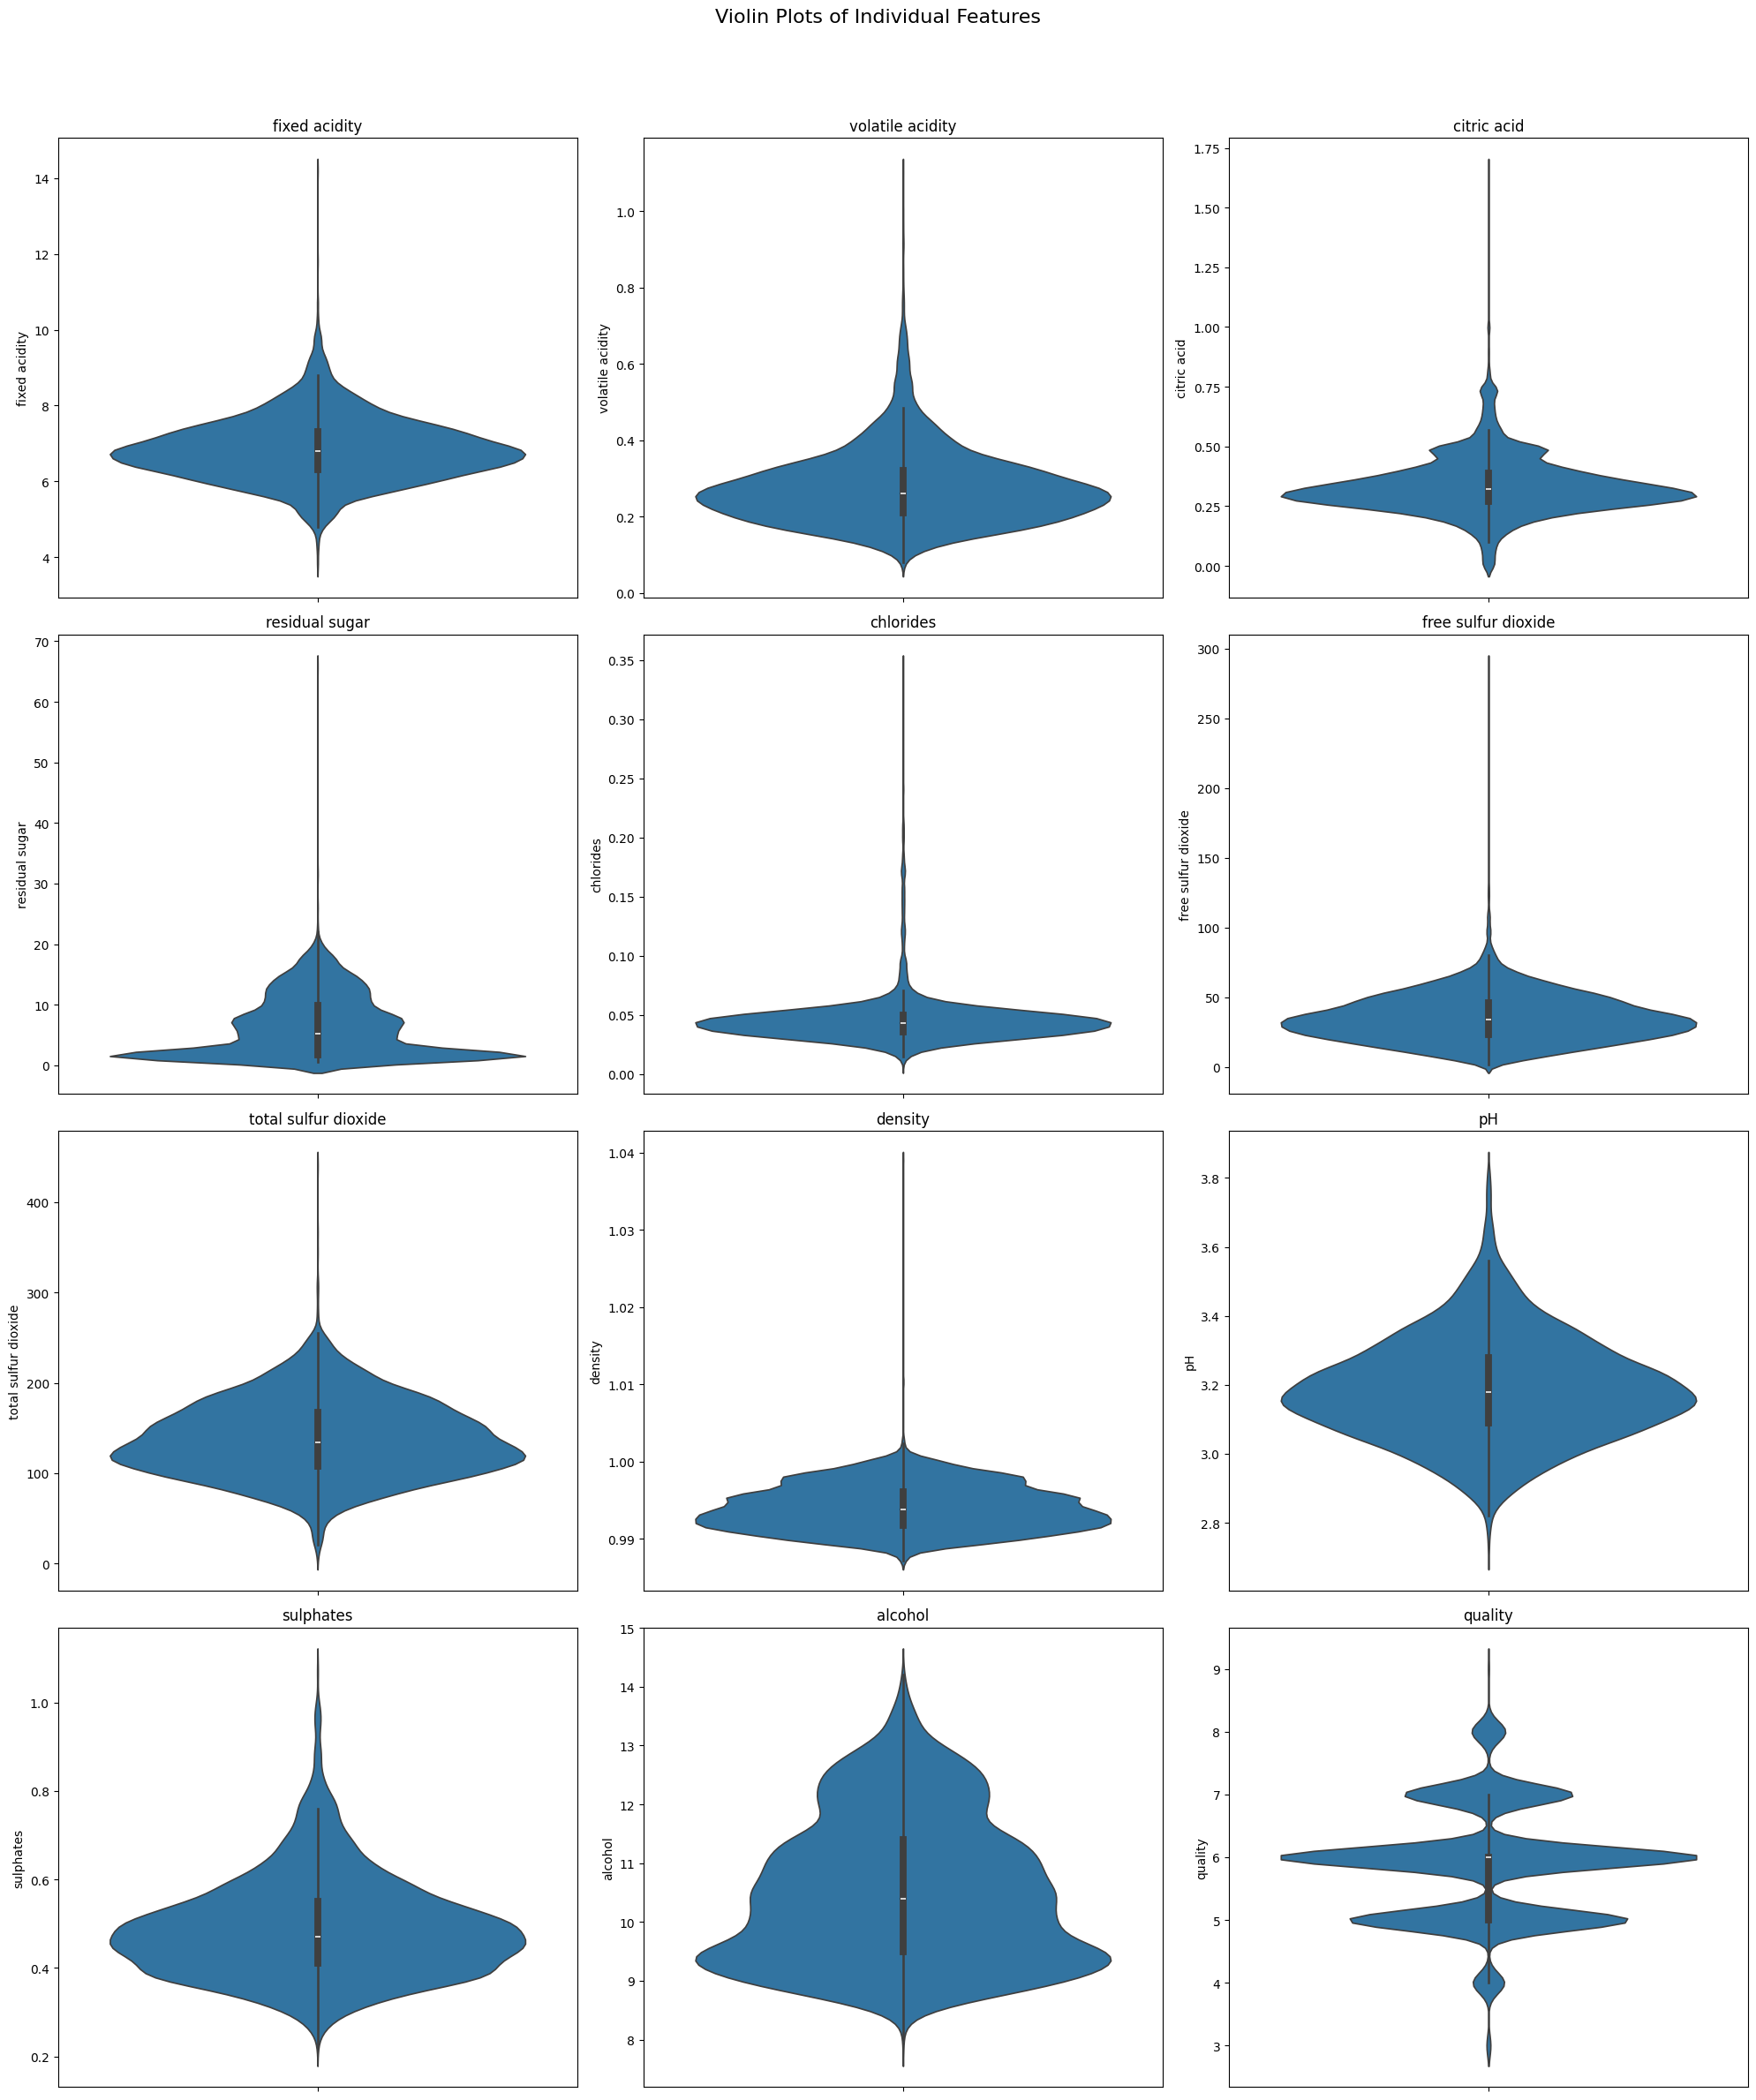

In [17]:
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
            'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
            'density', 'pH', 'sulphates', 'alcohol', 'quality']

fig, axes = plt.subplots(4, 3, figsize=(20, 25))
fig.suptitle('Violin Plots of Individual Features', fontsize=16)

axes = axes.flatten()

for i, feature in enumerate(features):
    sns.violinplot(y=df[feature], ax=axes[i])
    axes[i].set_title(feature)
    axes[i].set_xlabel('')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Question 5:

Train a linear regression model with a single input variable (alcohol). Plot all data points (x=alcohol; y=quality) and the obtained regression model. Show the intercept, coefficient, RMSE, and R^2.

In [9]:
# simple linear regression
# Y = b0 + b1X
# X = alcohol, y = quality

model = LinearRegression()
model.fit(df[['alcohol']], df['quality'])
print(f'b0 = {model.intercept_}')
print(f'b1 = {model.coef_[0]}')

# evaluating the mode (RMSE and R^2)
fitted = model.predict(df[['alcohol']])
RMSE = np.sqrt(mean_squared_error(df['quality'], fitted))
r2 = r2_score(df['quality'], fitted)
print(f'RMSE = {RMSE}')
print(f'r2 = {r2}')

b0 = 2.582009399174922
b1 = 0.3134693019118325
RMSE = 0.7971284628753889
r2 = 0.1897253327492563


## Question 6:

Train a linear regression model with input variables (volatile_acidity, alcohol, and density). Show the intercept, coefficient, RMSE, and R^2.

In [10]:
inputs = ['volatile acidity', 'alcohol', 'density']

model = LinearRegression()
model.fit(df[inputs], df['quality'])
print(f'b0 = {model.intercept_}')
print(f'b1 = {model.coef_[0]}')

# evaluating the mode (RMSE and R^2)
fitted = model.predict(df[inputs])
RMSE = np.sqrt(mean_squared_error(df['quality'], fitted))
r2 = r2_score(df['quality'], fitted)
print(f'RMSE = {RMSE}')
print(f'r2 = {r2}')

b0 = -36.498611307001624
b1 = -2.0721159353329517
RMSE = 0.76848726881725
r2 = 0.24690635619896484
